In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


datas = pd.read_json('../yelp_dataset/yelp_dataset_labeled.json', lines=True).fillna(0)
datas

,business_id,city,label,latitude,longitude,review_count,stars,state,neighbor_count,4star_neighbor_count,active_users_in_city,neighbor_review_count
0,ZrkH2I-ct6rYX1FNBhY1oA,Nahant,1,42.436666,-70.936382,19,3.0,MA,0,0,19,0.0
1,UYWYdJjPjQDTRqhpfGvRLw,Osteen,0,28.843058,-81.164583,5,4.0,FL,0,0,5,0.0
2,odq3dSNenceAyzoyNogosA,South Natick,1,42.263404,-71.309128,12,2.5,MA,0,0,12,0.0
3,uiBZ6yYQ0wv6nwdhkrf4nA,West Vancouver,0,49.334655,-123.180291,2,2.5,BC,13,9,145,62.0
4,vwKdjOBaGprrN3Qyn4u8sw,West Vancouver,0,49.373914,-123.274435,4,3.5,BC,8,3,145,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26332,WpBwwZ2qVQmveXd_0CZuJg,Hilliard,0,40.017815,-83.136995,16,4.5,OH,23,9,344,205.0
26333,yHixklhb5guNmcvWkg8qZw,Hilliard,1,40.030409,-83.156736,8,4.0,OH,32,18,344,296.0
26334,GiIWtDUqYHIheAKT0zKs4g,Hilliard,1,40.017995,-83.136033,15,4.0,OH,23,8,344,198.0
26335,i4YPpmtUfkQSCNu1T7aZYA,Berkshire,0,40.267734,-82.924768,2,2.5,OH,0,0,2,0.0


In [2]:
y = datas['label']
city = datas['city']
state = datas['state']
city_dummies = pd.get_dummies(city, drop_first=True)
state_dummies = pd.get_dummies(state, drop_first=True)
x = pd.concat(objs=[datas.drop(columns=['business_id', 'label', 'city', 'state']), city_dummies, state_dummies], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_train


,latitude,longitude,review_count,stars,neighbor_count,4star_neighbor_count,active_users_in_city,neighbor_review_count,AUSTIN,Alamonte Springs,...,CO,DE,FL,GA,KS,MA,OH,OR,TX,WA
8950,30.307998,-97.750562,87,4.0,118,76,13599,2692.0,0,0,...,0,0,0,0,0,0,0,0,1,0
14475,33.746369,-84.372802,17,4.0,216,128,12551,6019.0,0,0,...,0,0,0,1,0,0,0,0,0,0
23281,28.460843,-81.466819,68,4.5,211,86,13249,6860.0,0,0,...,0,0,1,0,0,0,0,0,0,0
17353,28.756708,-81.353004,2,3.5,48,20,506,576.0,0,0,...,0,0,1,0,0,0,0,0,0,0
8437,30.402037,-97.726375,16,3.5,121,60,13599,3977.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22530,28.444469,-81.394154,7,4.0,61,23,13249,731.0,0,0,...,0,0,1,0,0,0,0,0,0,0
14173,45.679014,-122.625941,24,4.0,10,6,7159,62.0,0,0,...,0,0,0,0,0,0,0,0,0,1
252,42.370395,-71.236725,39,4.0,71,35,679,857.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2046,42.330008,-71.083464,7,4.0,8,4,70,68.0,0,0,...,0,0,0,0,0,1,0,0,0,0


Confusion matrix, without normalization
0.6799544419134397


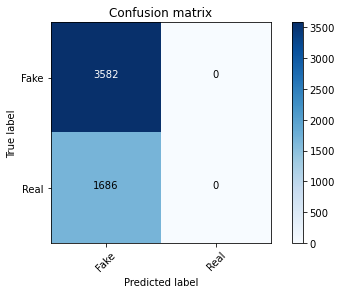

In [9]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
print(clf.score(X_test, y_test))

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.362
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.45e-05
Time:                        20:09:02   Log-Likelihood:                -13508.
No. Observations:               21069   AIC:                         2.768e+04
Df Residuals:                   20735   BIC:                         3.034e+04
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 